# Code to create census test data for the City of Toronto, with socioeconomic variables required for CommuteCA Rmarkdowns 6 and 7

Load libraries:

In [2]:
import pandas as pd
import numpy as np
from scipy.special import expit 
import seaborn as sns

Read census test csv:

In [3]:
census = pd.read_csv("C:/Bruno/CommuteCA/data-ignore-inputs/census_test_v3.csv")

In [4]:
census

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,PWDA,PWPR,PWCD,PWCMA,PWDUR,PWDist,PwMode
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,35202127,35,3520,535,43,12951,3
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,-3,-3,-3,-3,-3,-3,-3
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,-3,-3,-3,-3,-3,-3,-3
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,-3,-3,-3,-3,-3,-3,-3
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,-3,-3,-3,-3,-3,-3,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,13070315,13,999,1307,172,2,57167.7000,5,3,-3,-3,-3,-3,-3,-3,-3
199996,199997,35580486,35,595,3558,2087,1,69138.3600,4,3,35580356,35,3558,595,14,5270,9
199997,199998,24320076,24,999,2432,724,2,20047.8000,5,3,-3,-3,-3,-3,-3,-3,-3
199998,199999,48060630,48,825,4806,280,2,48584.7000,4,2,-3,-3,-3,-3,-3,-3,-3


Ensuring that PCD (Census Division) is in a correct type:

In [5]:
census['PCD'] = census['PRCDDA'].astype(str).str.slice(0, 4)

In [6]:
census['PCD']

0         3520
1         3520
2         3520
3         3520
4         3520
          ... 
199995    1307
199996    3558
199997    2432
199998    4806
199999    1006
Name: PCD, Length: 200000, dtype: object

In [7]:
census_toronto = census[census['PCD'] == '3520']

In [8]:
census_toronto

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,PWDA,PWPR,PWCD,PWCMA,PWDUR,PWDist,PwMode
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,35202127,35,3520,535,43,12951,3
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,-3,-3,-3,-3,-3,-3,-3
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,-3,-3,-3,-3,-3,-3,-3
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,-3,-3,-3,-3,-3,-3,-3
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,-3,-3,-3,-3,-3,-3,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198694,198695,35203174,35,535,3520,1109,1,126453.8000,3,2,35240577,35,3524,535,104,37960,1
198699,198700,35203788,35,535,3520,1591,1,70285.2768,4,3,35200218,35,3520,535,34,10115,3
199560,199561,35200202,35,535,3520,1434,1,61195.2000,5,4,35210345,35,3521,535,85,31133,1
199573,199574,35201510,35,535,3520,448,1,44103.4000,3,1,35202699,35,3520,535,42,15523,1


Reading file with the accessibility values:

In [ ]:
SA_i_i_general = pd.read_csv("C:/Bruno/CommuteCA/data-ignore-inputs/Santos_released/released/SA_general.csv")

In [11]:
SA_general

,PRCDDA,SA_i
0,35200002,63.598012
1,35200003,70.398706
2,35200004,86.382538
3,35200005,77.886525
4,35200006,110.135758
...,...,...
3722,35205065,795.629186
3723,35205066,507.321157
3724,35205067,650.511857
3725,35205068,485.248612


Join census test data and accessibility:

In [12]:
census_toronto_sa = census_toronto.merge(SA_general, right_on= 'PRCDDA', left_on='PRCDDA', how = 'left').fillna(0)

In [13]:
census_toronto_sa

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,PWDA,PWPR,PWCD,PWCMA,PWDUR,PWDist,PwMode,SA_i
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,35202127,35,3520,535,43,12951,3,136.048047
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,-3,-3,-3,-3,-3,-3,-3,129.636927
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,-3,-3,-3,-3,-3,-3,-3,94.126324
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,-3,-3,-3,-3,-3,-3,-3,202.667594
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,-3,-3,-3,-3,-3,-3,-3,112.408584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52645,198695,35203174,35,535,3520,1109,1,126453.8000,3,2,35240577,35,3524,535,104,37960,1,241.159571
52646,198700,35203788,35,535,3520,1591,1,70285.2768,4,3,35200218,35,3520,535,34,10115,3,326.418050
52647,199561,35200202,35,535,3520,1434,1,61195.2000,5,4,35210345,35,3521,535,85,31133,1,195.762870
52648,199574,35201510,35,535,3520,448,1,44103.4000,3,1,35202699,35,3520,535,42,15523,1,243.451098


## Creating demographic variables

Age:

In [15]:
maximum = 120
minimum = 1

samples = np.random.beta(a=2, b=4, size=len(census_toronto_sa))
scaled = samples * (maximum - 1) + 1
scaled = scaled.astype(int)

census_toronto_sa['AGE'] = scaled

In [16]:
census_toronto_sa

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,PWDA,PWPR,PWCD,PWCMA,PWDUR,PWDist,PwMode,SA_i,AGE
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,35202127,35,3520,535,43,12951,3,136.048047,52
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,-3,-3,-3,-3,-3,-3,-3,129.636927,46
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,-3,-3,-3,-3,-3,-3,-3,94.126324,38
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,-3,-3,-3,-3,-3,-3,-3,202.667594,65
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,-3,-3,-3,-3,-3,-3,-3,112.408584,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52645,198695,35203174,35,535,3520,1109,1,126453.8000,3,2,35240577,35,3524,535,104,37960,1,241.159571,43
52646,198700,35203788,35,535,3520,1591,1,70285.2768,4,3,35200218,35,3520,535,34,10115,3,326.418050,21
52647,199561,35200202,35,535,3520,1434,1,61195.2000,5,4,35210345,35,3521,535,85,31133,1,195.762870,24
52648,199574,35201510,35,535,3520,448,1,44103.4000,3,1,35202699,35,3520,535,42,15523,1,243.451098,41


Gender:

In [17]:
centered = census_toronto_sa['SA_i'] - census_toronto_sa['SA_i'].median() 
prob_gender_1 = 1 - expit(-centered * 0.005) 
census_toronto_sa['GENDER_BINARY'] = np.random.binomial(1, prob_gender_1) + 1

<AxesSubplot: xlabel='GENDER_BINARY', ylabel='SA_i'>

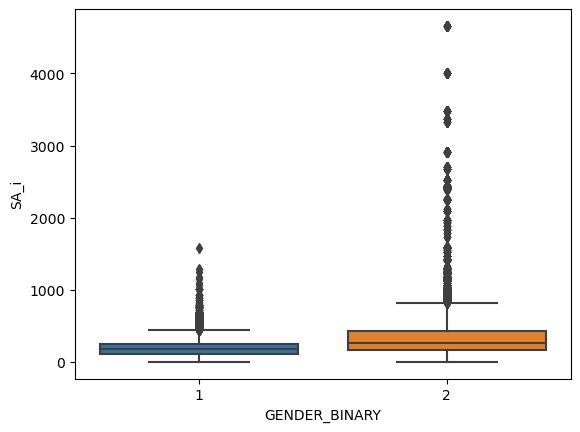

In [18]:
sns.boxplot(data=census_toronto_sa, x='GENDER_BINARY', y='SA_i')

Low income:

In [19]:
prob_high = expit(centered * 0.006)   
prob_low = expit(-centered * 0.006)

total = prob_high + prob_low + prob_high + prob_low
p1 = prob_high / total  
p2 = prob_low / total   
p3 = prob_high / total 
p4 = prob_low / total   

probs = np.vstack([p1, p2, p3, p4]).T  

n = len(census_toronto_sa)
prob_minus_3 = 0.03

is_minus_3 = np.random.rand(n) < prob_minus_3

LOLICOA = []

choices_core = [1, 2, 3, 4]

for i in range(n):
    if is_minus_3[i]:
        LOLICOA.append(-3)
    else:
        LOLICOA.append(np.random.choice(choices_core, p=probs[i]))

census_toronto_sa['LOLICOA'] = LOLICOA

<AxesSubplot: xlabel='LOLICOA', ylabel='SA_i'>

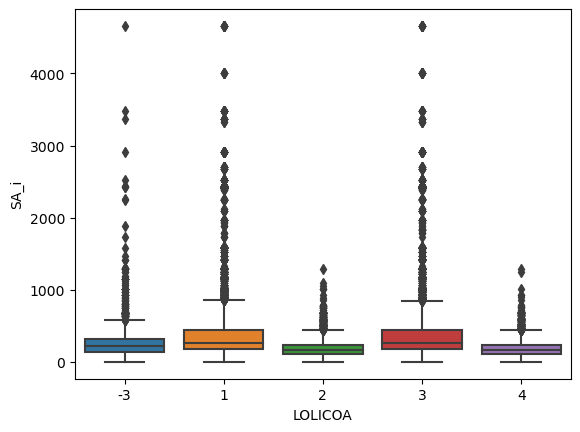

In [20]:
sns.boxplot(data=census_toronto_sa, x='LOLICOA', y='SA_i')

In [21]:
prob_high = expit(centered * 0.0065)   
prob_low = expit(-centered * 0.0065)

total = prob_high + prob_low + prob_high + prob_low
p1 = prob_high / total  
p2 = prob_low / total   
p3 = prob_high / total 
p4 = prob_low / total   

probs = np.vstack([p1, p2, p3, p4]).T  

n = len(census_toronto_sa)
prob_minus_3 = 0.03

is_minus_3 = np.random.rand(n) < prob_minus_3

LoLIMA = []

choices_core = [1, 2, 3, 4]

for i in range(n):
    if is_minus_3[i]:
        LoLIMA.append(-3)
    else:
        LoLIMA.append(np.random.choice(choices_core, p=probs[i]))

census_toronto_sa['LoLIMA'] = LoLIMA

<AxesSubplot: xlabel='LoLIMA', ylabel='SA_i'>

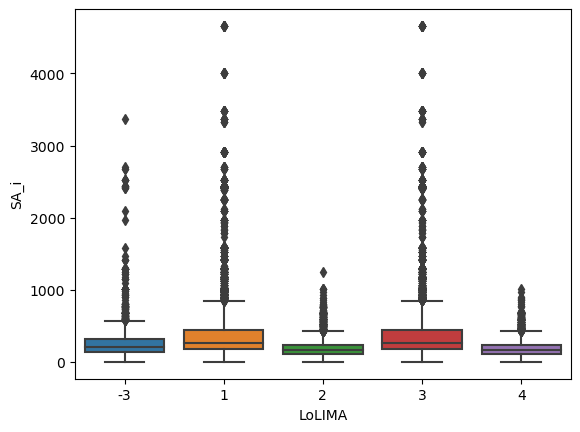

In [22]:
sns.boxplot(data=census_toronto_sa, x='LoLIMA', y='SA_i')

Activities of daily living (Flag):

In [23]:
prob_high = expit(centered * 0.0070)   
prob_middle = expit(centered * 0.0045)   
prob_low = expit(-centered * 0.0003)

total = prob_high + prob_low + prob_middle + prob_low
p1 = prob_low / total  
p2 = prob_low / total   
p3 = prob_middle / total 
p4 = prob_high / total   

probs = np.vstack([p1, p2, p3, p4]).T  

n = len(census_toronto_sa)
prob_minus_2 = 0.02

is_minus_2 = np.random.rand(n) < prob_minus_2

ACTLMFLG = []

choices_core = [1, 2, 3, 4]

for i in range(n):
    if is_minus_2[i]:
        ACTLMFLG.append(-2)
    else:
        ACTLMFLG.append(np.random.choice(choices_core, p=probs[i]))

census_toronto_sa['ACTLMFLG'] = ACTLMFLG

<AxesSubplot: xlabel='ACTLMFLG', ylabel='SA_i'>

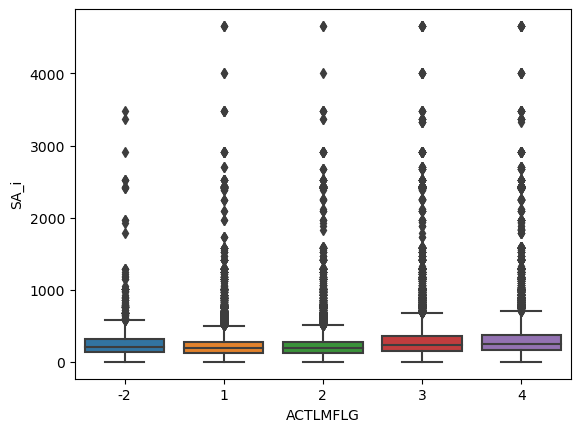

In [24]:
sns.boxplot(data=census_toronto_sa, x='ACTLMFLG', y='SA_i')

Family type:

In [25]:
centered = census_toronto_sa['SA_i'] - census_toronto_sa['SA_i'].median() 
prob_gender_1 = 1 - expit(centered * 0.005) 
census_toronto_sa['CFAMSTSIMPLE'] = np.random.binomial(1, prob_gender_1) + 1

<AxesSubplot: xlabel='CFAMSTSIMPLE', ylabel='SA_i'>

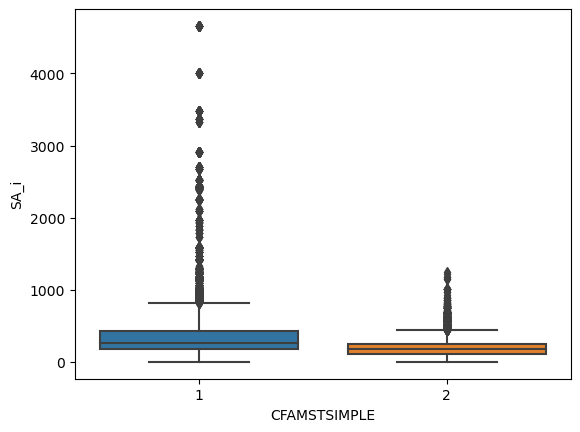

In [26]:
sns.boxplot(data=census_toronto_sa, x='CFAMSTSIMPLE', y='SA_i')

Immigration category:

In [27]:
centered = census_toronto_sa['SA_i'] - census_toronto_sa['SA_i'].median() 
prob_gender_1 = 1 - expit(centered * 0.005) 
census_toronto_sa['IMMCAT5'] = np.random.binomial(1, prob_gender_1) + 1
census_toronto_sa.loc[census_toronto_sa['IMMCAT5'] == 2, 'IMMCAT5'] = 300000

<AxesSubplot: xlabel='IMMCAT5', ylabel='SA_i'>

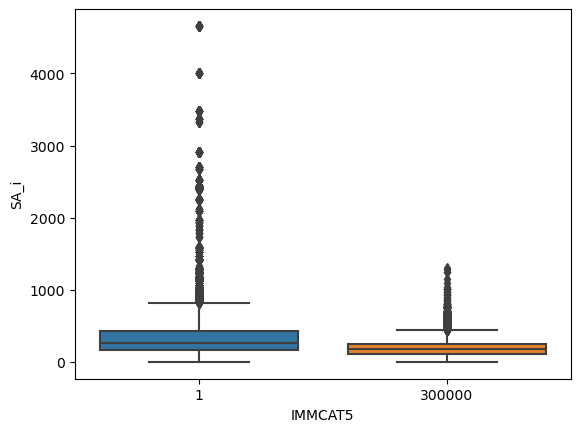

In [28]:
sns.boxplot(data=census_toronto_sa, x='IMMCAT5', y='SA_i')

Immigration period:

In [29]:
centered = census_toronto_sa['SA_i'] - census_toronto_sa['SA_i'].median() 
prob_gender_1 = 1 - expit(centered * 0.005) 
census_toronto_sa['PerImmA'] = np.random.binomial(1, prob_gender_1) + 1
census_toronto_sa.loc[census_toronto_sa['PerImmA'] == 2, 'PerImmA'] = 10

<AxesSubplot: xlabel='PerImmA', ylabel='SA_i'>

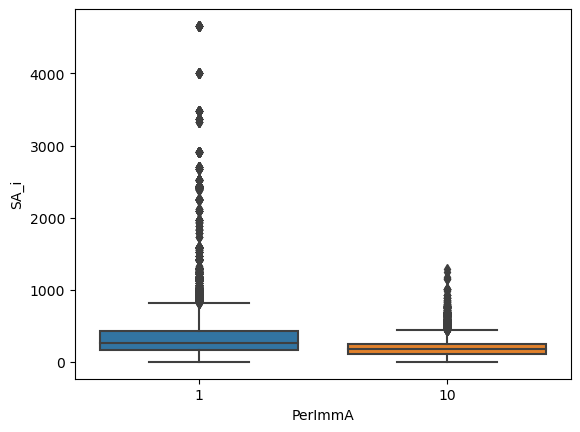

In [30]:
sns.boxplot(data=census_toronto_sa, x='PerImmA', y='SA_i')

Visible minority:

In [31]:
centered = census_toronto_sa['SA_i'] - census_toronto_sa['SA_i'].mean()

scale = 0.0065

high_prob = expit(centered * scale)
low_prob = expit(-centered * scale)
neutral_prob = np.full_like(high_prob, 0.5) 


high_SA_groups = [1,10,11]
low_SA_groups = [4,7,9,12,13,14]
mixed_groups = [2,3,5,6,8]

all_groups = high_SA_groups + low_SA_groups + mixed_groups

prob_matrix = []

for i in range(len(census_toronto_sa)):
    row_probs = []
    for group in all_groups:
        if group in high_SA_groups:
            row_probs.append(high_prob[i])
        elif group in low_SA_groups:
            row_probs.append(low_prob[i])
        else:  
            row_probs.append(neutral_prob[i])
   
    row_probs = np.array(row_probs)
    row_probs /= row_probs.sum()
    prob_matrix.append(row_probs)

DVisMin = [np.random.choice(all_groups, p=probs) for probs in prob_matrix]

census_toronto_sa['DVisMin'] = DVisMin

<AxesSubplot: xlabel='DVisMin', ylabel='SA_i'>

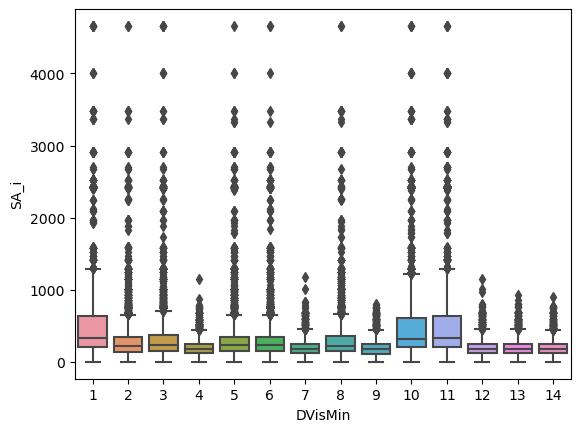

In [32]:
sns.boxplot(data=census_toronto_sa, x='DVisMin', y='SA_i')

Saving file:

In [37]:
census_toronto_sa = census_toronto_sa[['Frame_ID', 'PRCDDA', 'Pr', 'CMA', 'PCD', 'CompW1', 'LBR_FORC', 'CfInc',
       'CFCNT', 'CF_PnCF_NumEarners', 'PWDA', 'PWPR', 'PWCD', 'PWCMA', 'PWDUR',
       'PWDist', 'PwMode','AGE', 'GENDER_BINARY', 'LOLICOA', 'LoLIMA',
       'ACTLMFLG', 'CFAMSTSIMPLE', 'IMMCAT5', 'PerImmA', 'DVisMin']]

In [38]:
census_toronto_sa

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,...,PwMode,AGE,GENDER_BINARY,LOLICOA,LoLIMA,ACTLMFLG,CFAMSTSIMPLE,IMMCAT5,PerImmA,DVisMin
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,...,3,52,2,2,1,4,2,1,10,10
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,...,-3,46,2,3,3,2,2,1,10,14
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,...,-3,38,2,2,4,1,1,300000,1,12
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,...,-3,65,1,2,1,3,2,1,10,1
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,...,-3,28,1,1,4,2,2,300000,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52645,198695,35203174,35,535,3520,1109,1,126453.8000,3,2,...,1,43,2,1,3,2,2,1,10,10
52646,198700,35203788,35,535,3520,1591,1,70285.2768,4,3,...,3,21,1,2,3,3,1,300000,10,3
52647,199561,35200202,35,535,3520,1434,1,61195.2000,5,4,...,1,24,1,4,2,3,1,1,1,5
52648,199574,35201510,35,535,3520,448,1,44103.4000,3,1,...,1,41,1,3,4,1,2,300000,10,13


In [39]:
census_toronto_sa.to_csv("C:/Bruno/CommuteCA/data-ignore-inputs/census_test_toronto.csv", index=False)